In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Estadística descriptiva

## Gapminder

Si gapminder no está instalado, ejecutrar el siguiente comando para instalarlo

In [12]:
#pip install gapminder

In [14]:
from gapminder import gapminder
display(gapminder)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [9]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# Vemos todos los países en la base
gapminder["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [5]:
# Cuántos países son?
gapminder["country"].nunique()

142

In [6]:
# Si queremos ver cuántos países hay en cada continente...
# podemos agregupar por continente y ver el tamaño de cada grupo
gapminder.groupby("continent").size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

In [10]:
# Pero cada país aparece varias veces, con datos de distintos años.
# Para contar sin repeticion usamos nuevamente nunique
gapminder.groupby("continent")["country"].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [9]:
# Si queremos calcular porcentajes, dividimos por la cantidad total de paises
totalPaises = gapminder["country"].nunique()
gapminder.groupby("continent")["country"].nunique() / totalPaises

continent
Africa      0.366197
Americas    0.176056
Asia        0.232394
Europe      0.211268
Oceania     0.014085
Name: country, dtype: float64

In [16]:
# O podemos usar el comando value_counts y pasarle un parámetro para que nos de los valores normalizados.
# (la normalización lleva la suma total a 1)
gapminder[["continent", "country"]].drop_duplicates().continent.value_counts(normalize=True)

Africa      0.366197
Asia        0.232394
Europe      0.211268
Americas    0.176056
Oceania     0.014085
Name: continent, dtype: float64

In [17]:
# Vemos todos los años disponibles
print(gapminder["year"].unique())

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [18]:
# Tenemos datos de todos los países todos los años?
# Agrupamos los datos por año y calculamos el tamaño de cada bloque
gapminder.groupby("year").size()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
dtype: int64

In [12]:
# O podemos usar directamente el comando value_counts
gapminder.year.value_counts()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: count, dtype: int64

In [48]:
# También podemos por ejemplo calcular la poblacion total por año
gapminder.groupby("year")["pop"].sum()

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: pop, dtype: int64

### Gráficos simples
Vamos a graficar la población total mundial en función del año.

In [5]:
pobAno = gapminder.groupby("year")["pop"].sum()
type(pobAno)

pandas.core.series.Series

In [16]:
# Pandas series son arrays indexados por otra variable
print(pobAno[2007])

6251013179


<Axes: xlabel='year'>

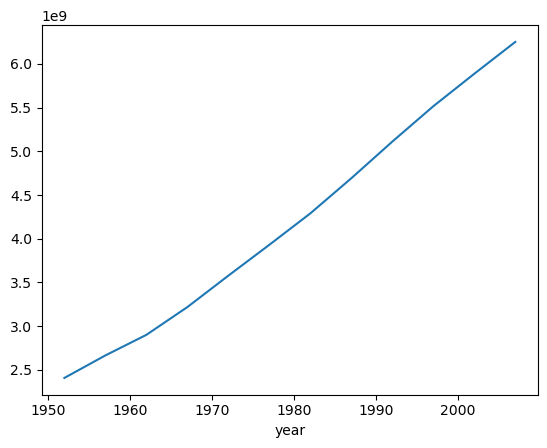

In [17]:
# Opción 1
# Usamos la función plot de series de pandas
pobAno.plot()

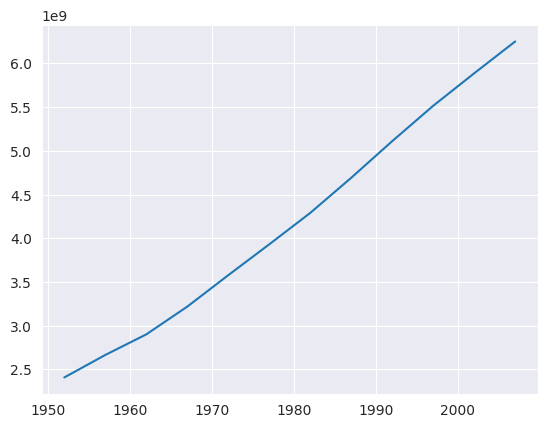

In [8]:
# Opcion 2
# Asignamos los valores a variables (arrays de numpy) y graficamos las variables
x = pobAno.index
y = pobAno.values
plt.plot(x,y)

In [11]:
# Vamos a analizar los datos de 2007
datos2007 = gapminder[gapminder["year"]==2007]

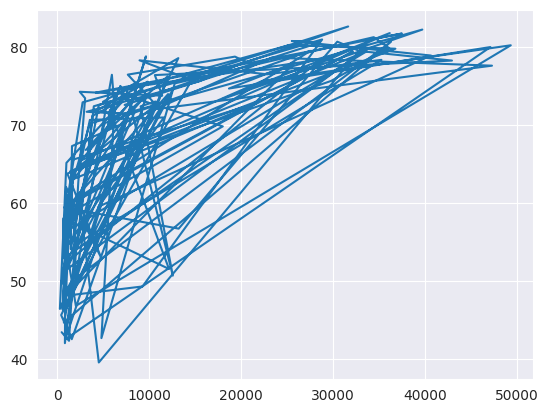

In [12]:
# Queremos ver si hay relación entre el producto bruto y la expectativa de vida
plt.plot(datos2007.gdpPercap, datos2007.lifeExp)
plt.show()

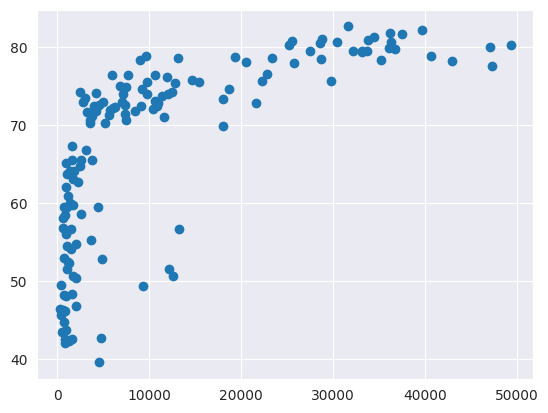

In [13]:
# Ay no, eso no, hacemos un "scatter plot"
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.show()

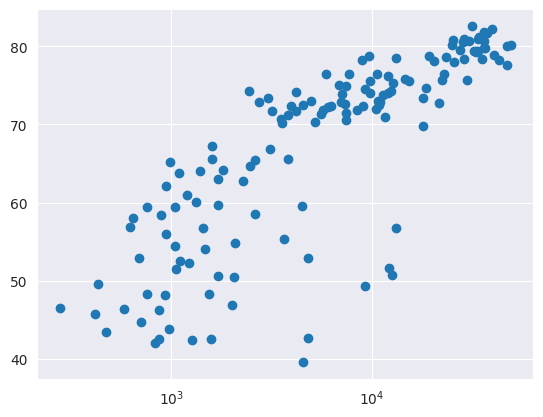

In [14]:
# Se ve mejor la correlación si usamos escala logaritmica en el eje X
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.show()

Vamos a mejorar un poco el gráfico

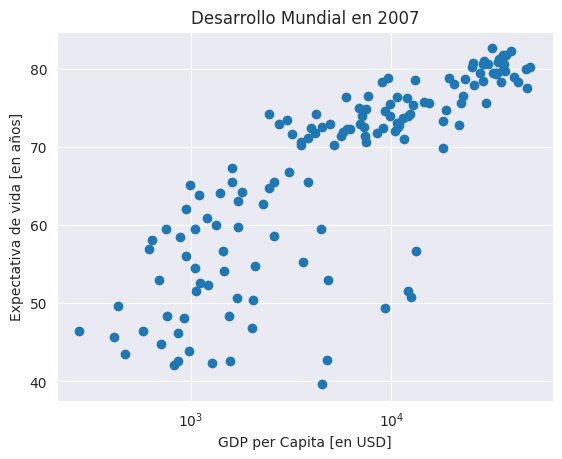

In [15]:
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.show()

Reemplacemos las marcas en el eje $x$ 10³, 10⁴, 10⁵ con 1k, 10k y 100k. 

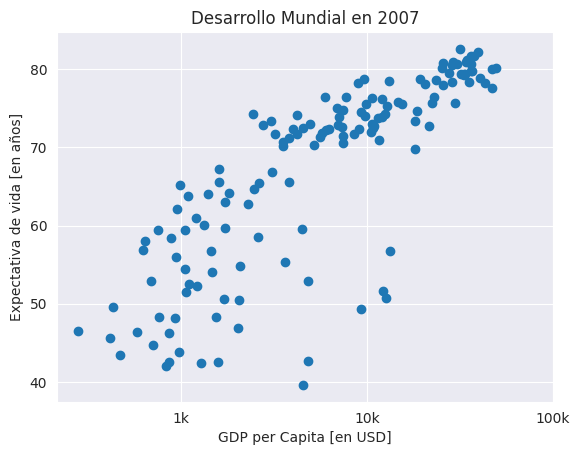

In [16]:
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

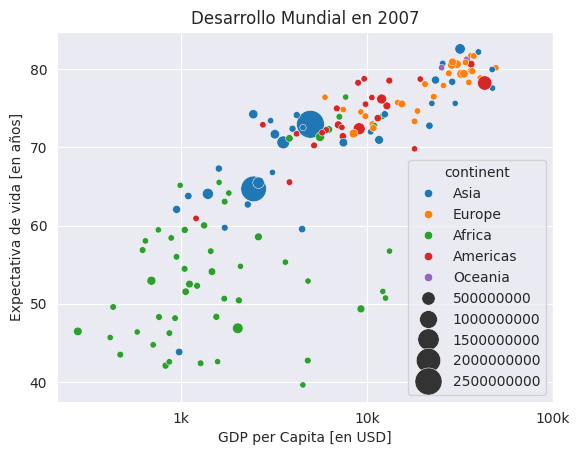

In [17]:
# Alcenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])
np_pop2 = np_pop*2
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico
sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

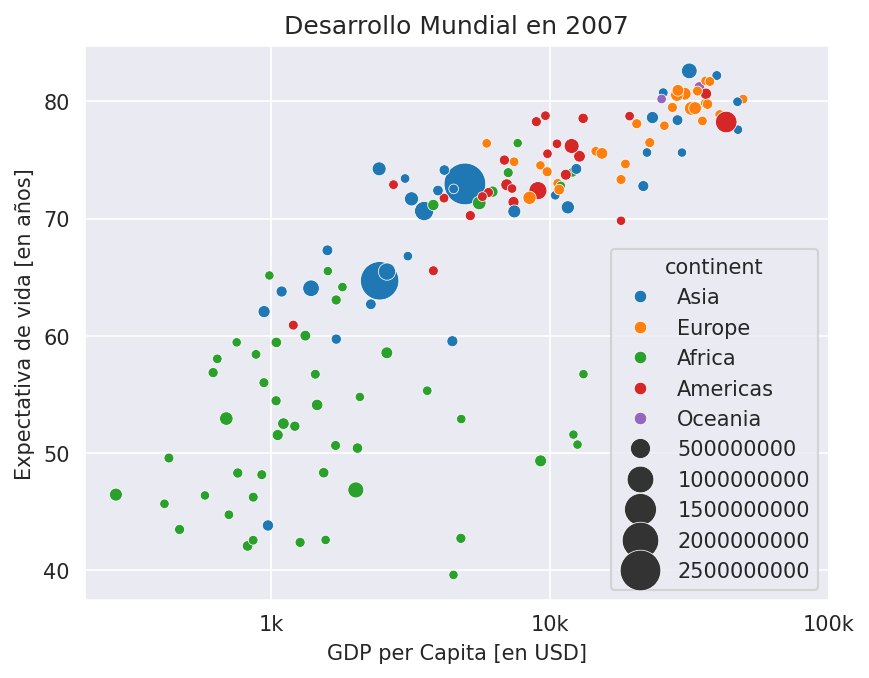

In [18]:
# Aumenta el tamaño del gráfico
plt.figure(dpi=150)
# Alcenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])
np_pop2 = np_pop*2
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico
sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

1.9 Calcular la media y mediana de la expectativa de vida entre países en 1952 usando los datos de gapminder (variable: lifeExp).

1.10 Definir desvío estándar. ¿Por qué la diferencia en el numerador está elevada al cuadrado? Escribir una función de R que calcule el desvío estándar. Comparar el resultado de usar la función sd()de R-base.

1.11 Calcular el rango y el desvío estandar de la expectativa de vida (lifeExp) entre países tomando sólo el dataset gapminder para el año 1952.


# Palmerpenguins
## Visualización de datos

In [112]:
pip install palmerpenguins

  Obtaining dependency information for palmerpenguins from https://files.pythonhosted.org/packages/23/78/d81191d1faf9c41e8707eb0c08dc6d489157bfa42faad62e0ab90c37ebbc/palmerpenguins-0.1.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [113]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
sns.set_style('whitegrid')

In [114]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Text(0, 0.5, 'Body Mass')

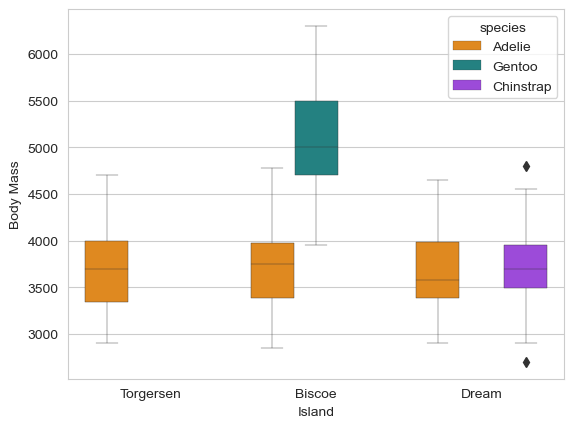

In [115]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = penguins,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

C:\Users\Santiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


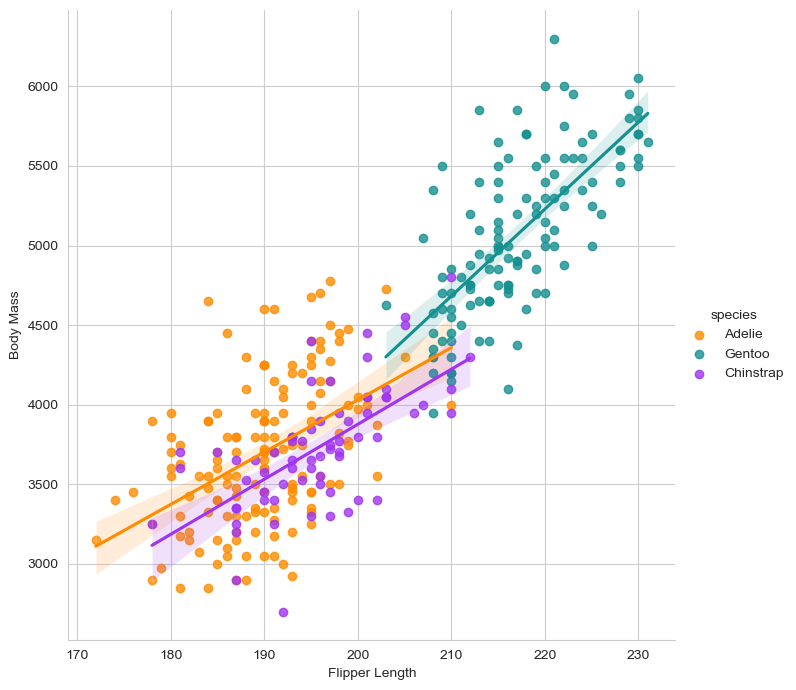

In [119]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')